In [10]:
# Import our dependencies
import pandas as pd
import pickle
from matplotlib import pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

complete_data_df= pd.read_csv("resources/avg_by_region.csv")
complete_data_df.head()


,id,age,average_income,sex,bmi,children,smoker,region,charges,average_age
0,0,18,10753.5,male,33.77,1,no,southeast,1725.5523,78.43
1,1,18,10753.5,male,34.10,0,no,southeast,1137.0110,78.43
2,5,18,10753.5,male,31.68,2,yes,southeast,34303.1672,78.43
3,9,18,10753.5,female,36.85,0,yes,southeast,36149.4835,78.43
4,11,18,10753.5,female,38.28,0,no,southeast,1631.8212,78.43


In [11]:
complete_data_df.nunique()

id                1338
age                 47
average_income      47
sex                  2
bmi                548
children             6
smoker               2
region               4
charges           1337
average_age          4
dtype: int64

In [12]:
complete_data_cat = complete_data_df.dtypes[complete_data_df.dtypes == "object"].index.tolist()




complete_data_df


,id,age,average_income,sex,bmi,children,smoker,region,charges,average_age
0,0,18,10753.50,male,33.770,1,no,southeast,1725.55230,78.43
1,1,18,10753.50,male,34.100,0,no,southeast,1137.01100,78.43
2,5,18,10753.50,male,31.680,2,yes,southeast,34303.16720,78.43
3,9,18,10753.50,female,36.850,0,yes,southeast,36149.48350,78.43
4,11,18,10753.50,female,38.280,0,no,southeast,1631.82120,78.43
...,...,...,...,...,...,...,...,...,...,...
1333,1316,64,87985.91,male,24.700,1,no,northwest,30166.61817,79.88
1334,1321,64,87985.91,female,30.115,3,no,northwest,16455.70785,79.88
1335,1323,64,87985.91,female,32.965,0,no,northwest,14692.66935,79.88
1336,1330,64,87985.91,male,37.905,0,no,northwest,14210.53595,79.88


In [13]:
complete_data_df.head(5)

,id,age,average_income,sex,bmi,children,smoker,region,charges,average_age
0,0,18,10753.5,male,33.77,1,no,southeast,1725.5523,78.43
1,1,18,10753.5,male,34.10,0,no,southeast,1137.0110,78.43
2,5,18,10753.5,male,31.68,2,yes,southeast,34303.1672,78.43
3,9,18,10753.5,female,36.85,0,yes,southeast,36149.4835,78.43
4,11,18,10753.5,female,38.28,0,no,southeast,1631.8212,78.43


In [14]:
dummies = pd.get_dummies(complete_data_df[['sex', 'smoker', 'region']], drop_first=True)
text_features = pd.concat([complete_data_df.drop(['sex', 'smoker', 'region'],axis=1), dummies],axis=1)
text_features.head()

,id,age,average_income,bmi,children,charges,average_age,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,18,10753.5,33.77,1,1725.5523,78.43,1,0,0,1,0
1,1,18,10753.5,34.10,0,1137.0110,78.43,1,0,0,1,0
2,5,18,10753.5,31.68,2,34303.1672,78.43,1,1,0,1,0
3,9,18,10753.5,36.85,0,36149.4835,78.43,0,1,0,1,0
4,11,18,10753.5,38.28,0,1631.8212,78.43,0,0,0,1,0


0.7157293737448678
0.8354294591329328
0.8234220912699165
0.802624162203077
0.7363600345149188
0.6934494875505717
0.6577330850668739
0.6383343988640974


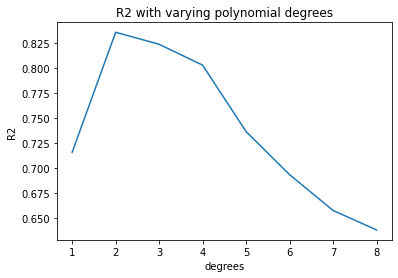

In [15]:
x = text_features.drop(['id', 'charges', 'sex_male', 'region_northwest', 'region_southeast', 'region_southwest', "average_age"], axis = 1)
y = text_features.charges

# changing the number of degrees will reduce the predicted value. 2 is the optimal number of degrees 


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

rmseall = []
r2all = []
degrees = [1,2,3,4,5,6,7,8]

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x_train, y_train)
    y_poly_pred = model.predict(x_test)

    rmse_poly= np.sqrt(mean_squared_error(y_test, y_poly_pred))
    r2_poly = r2_score(y_test, y_poly_pred)

    rmseall.append(rmse_poly)
    r2all.append(r2_poly)
    
    print(model.score(x_test, y_test))


plt.plot(degrees, r2all)
plt.xlabel('degrees')
plt.ylabel('R2')
plt.title("R2 with varying polynomial degrees")
plt.show()





In [16]:
# pridicting the charges 
y_test_pred = model.predict(x_test)


#compare the acutal value with our predicted value 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
917,42856.83800,47623.042103
539,19964.74630,24275.253470
358,13831.11520,11789.571924
1247,9910.35985,11101.691772
945,11253.42100,7994.969015
...,...,...
858,7371.77200,8218.363318
1119,5693.43050,7121.433405
1296,11945.13270,15036.869158
1280,11082.57720,8998.672747


In [17]:
for column in x.columns:
    print(column)

age
average_income
bmi
children
smoker_yes


In [18]:
import pickle 

pickle_out = open("model.pkl", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()